In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221216_ann_fri.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-17 01:00:00,#霜降り明星ANN,89400309,kogarasumaru0
1,2022-12-17 01:00:00,#霜降り明星ANN,1393254060770304003,udon_suzukake
2,2022-12-17 01:00:00,#霜降り明星ANN,1334708791527395328,zutoharu
3,2022-12-17 01:00:00,#霜降り明星ANN,1498668282143981580,oyu_oooo
4,2022-12-17 01:00:00,#霜降り明星ANN,1497255241821351936,RNtubugai
...,...,...,...,...
1744,2022-12-17 03:02:09,霜降り明星のおふたり、 スタッフのみなさん、 リスナーのみなさん、 お疲れさまでした🍀 来週...,118058199,sakipiyo
1745,2022-12-17 03:02:51,楽しかった #霜降り明星ANN,3316395139,sironosuke93
1746,2022-12-17 03:03:02,「霜降り明星のオールナイトニッポン」12/16 ・収録放送でリスナーからの刺激的な質問に解答...,117025824,yakiniku30min
1747,2022-12-17 03:03:09,お疲れ様でした！！ 今週も面白かったです♪ #霜降り明星ANN,1483902289983066113,pecopeco9999


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-17 01:00:00,201
1,2022-12-17 01:01:00,55
2,2022-12-17 01:02:00,36
3,2022-12-17 01:03:00,33
4,2022-12-17 01:04:00,21
...,...,...
119,2022-12-17 02:59:00,44
120,2022-12-17 03:00:00,13
121,2022-12-17 03:01:00,9
122,2022-12-17 03:02:00,2


In [4]:
filename =  "count_221216_ann_fri.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(201, 1)

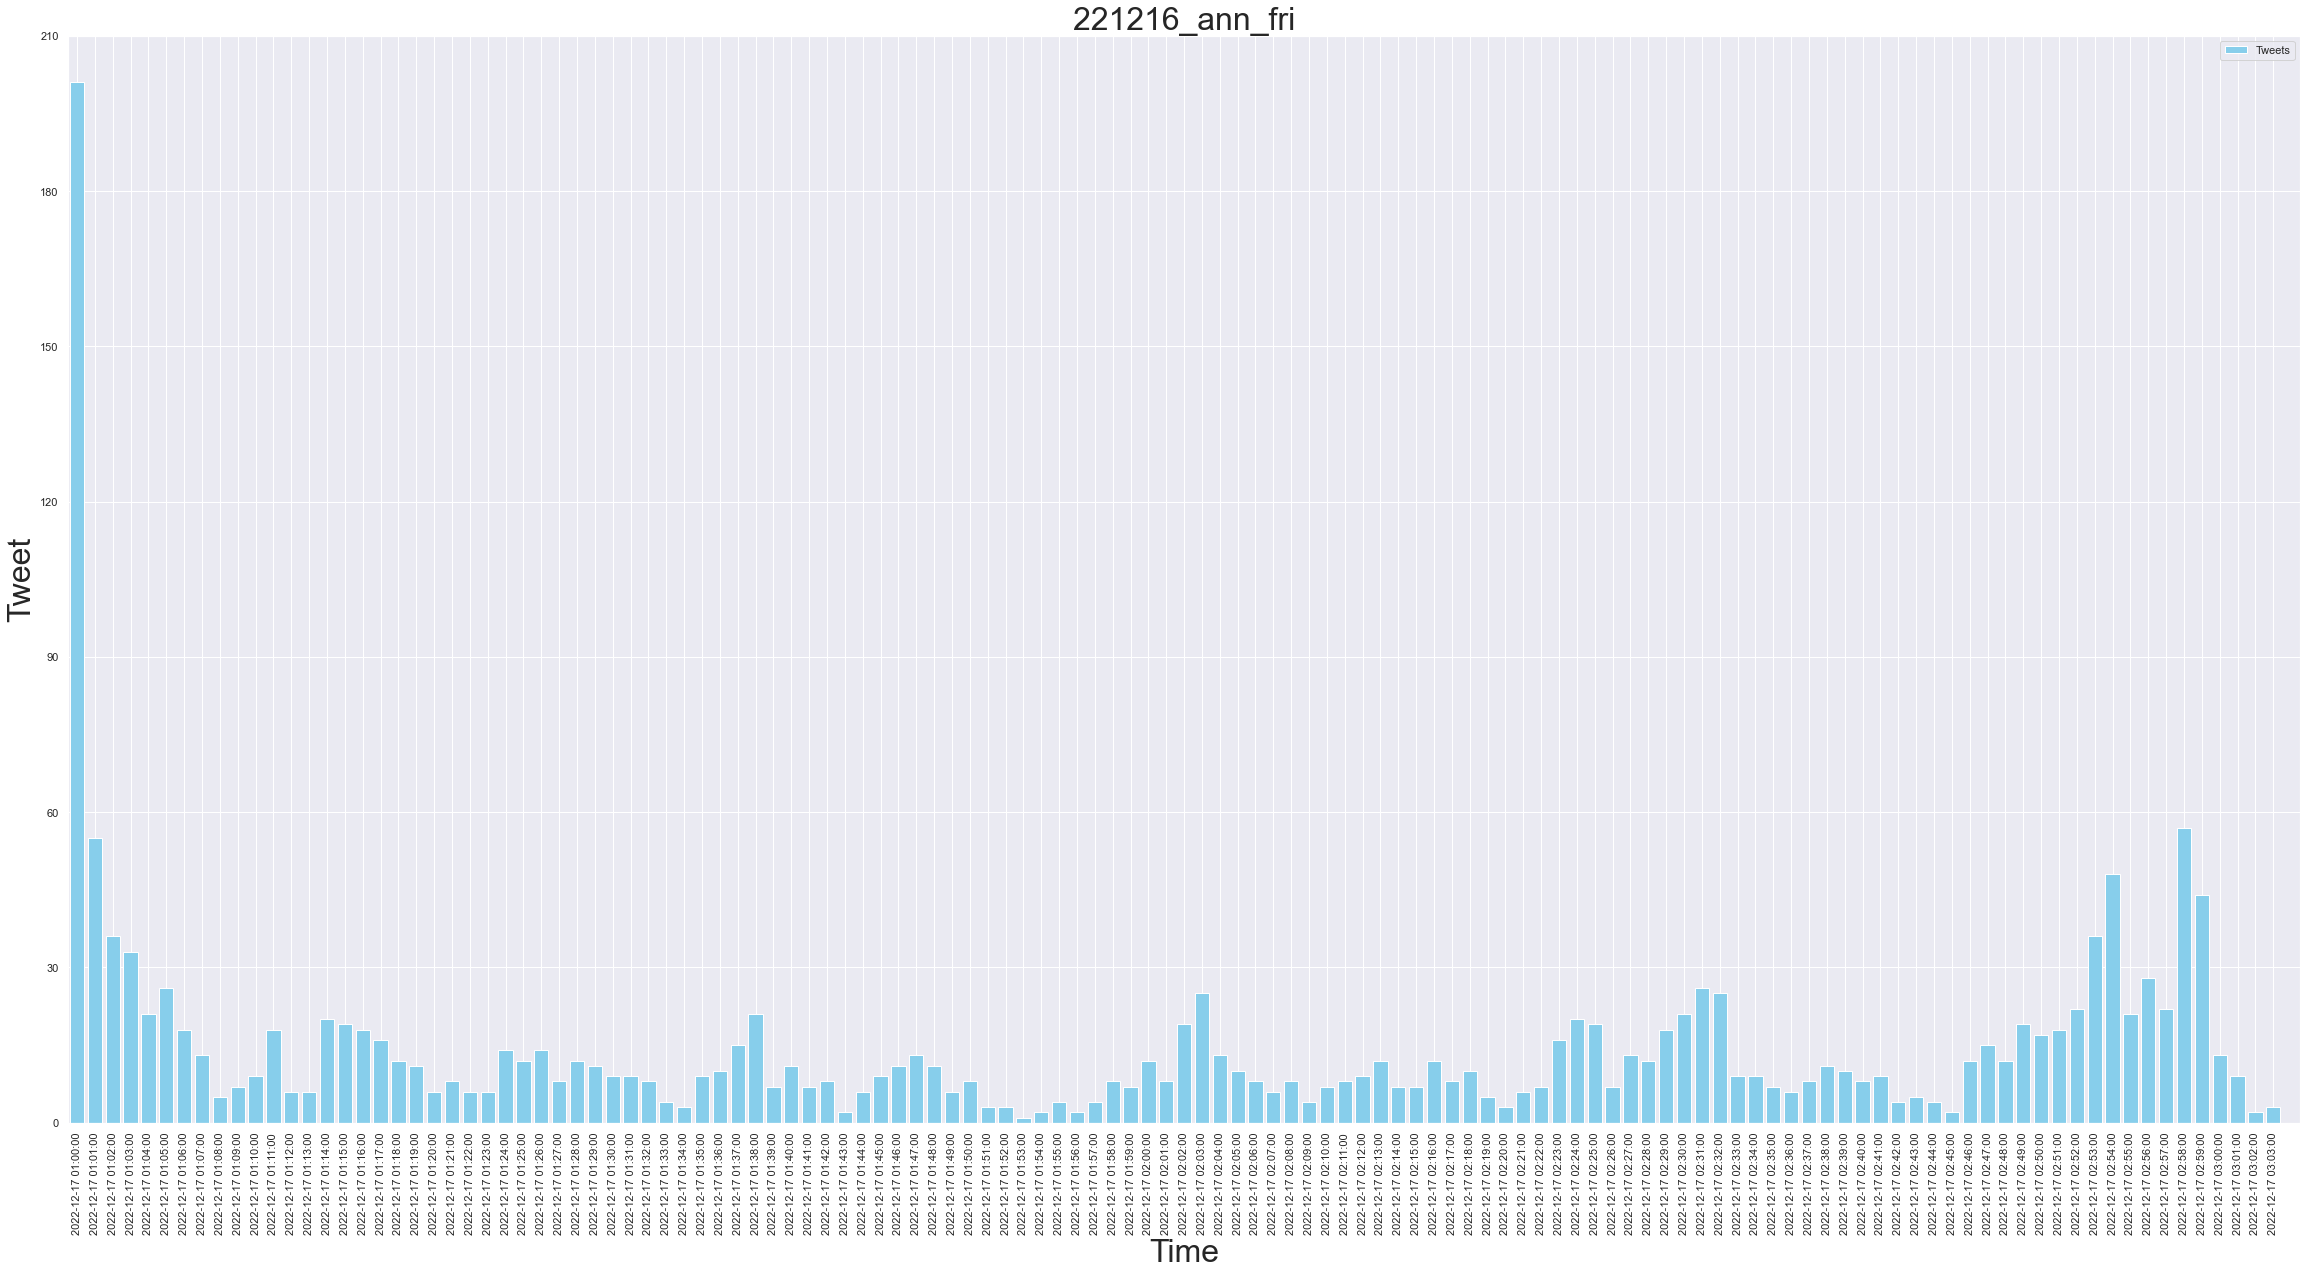

In [6]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221216_ann_fri", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 210) # y軸の範囲を指定する
start = 0
end = 211
stepsize = 30
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")